In [13]:
import numpy as np 
from numpy import nan
import pandas as pd 
import json
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime as dt

In [4]:
data_df = pd.read_csv("Nasdaq-100.csv")
data_df
data_df[["Symbol"]].head()
data = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
data['Symbol'].values.tolist()
data_list = data['Symbol'].values.tolist()
data_list

['ATVI',
 'ADBE',
 'AMD',
 'ALXN',
 'ALGN',
 'GOOG',
 'GOOGL',
 'AMZN',
 'AAL',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'ADSK',
 'ADP',
 'BIDU',
 'BIIB',
 'BMRN',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CERN',
 'CHTR',
 'CHKP',
 'CTAS',
 'CSCO',
 'CTXS',
 'CTSH',
 'CMCSA',
 'CPRT',
 'CSGP',
 'COST',
 'CSX',
 'DLTR',
 'EBAY',
 'EA',
 'EXC',
 'EXPE',
 'FB',
 'FAST',
 'FISV',
 'FOX',
 'FOXA',
 'GILD',
 'IDXX',
 'ILMN',
 'INCY',
 'INTC',
 'INTU',
 'ISRG',
 'JD',
 'KLAC',
 'LRCX',
 'LBTYA',
 'LBTYK',
 'LULU',
 'MAR',
 'MXIM',
 'MELI',
 'MCHP',
 'MU',
 'MSFT',
 'MDLZ',
 'MNST',
 'NTAP',
 'NTES',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'PCAR',
 'PAYX',
 'PYPL',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SGEN',
 'SIRI',
 'SWKS',
 'SPLK',
 'SBUX',
 'SNPS',
 'TMUS',
 'TTWO',
 'TSLA',
 'TXN',
 'KHC',
 'TCOM',
 'ULTA',
 'UAL',
 'VRSN',
 'VRSK',
 'VRTX',
 'WBA',
 'WDC',
 'WLTW',
 'WDAY',
 'XEL',
 'XLNX']

In [6]:
tomorrow=dt.date.today() + dt.timedelta(days=1)

datetime.date(2020, 4, 8)

ATVI
ADBE
AMD
ALXN
ALGN
GOOG
GOOGL
AMZN
AAL
AMGN
ADI
ANSS
AAPL
AMAT
ASML
ADSK
ADP
BIDU
BIIB
BMRN
BKNG
AVGO
C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
CDNS
CDW
CERN
C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
CHTR
CHKP
CTAS
CSCO
CTXS
CTSH
CMCSA
CPRT
CSGP
COST
CSX
DLTR
EBAY
EA
EXC
EXPE
FB
FAST
FISV
FOX
FOXA
GILD
IDXX
ILMN
INCY
INTC
INTU
ISRG
JD
KLAC
LRCX
LBTYA
LBTYK
LULU
MAR
MXIM
MELI
MCHP
MU
MSFT
MDLZ
MNST
NTAP
NTES
NFLX
NVDA
NXPI
ORLY
PCAR
PAYX
PYPL
PEP
QCOM
REGN
ROST
SGEN
SIRI
SWKS
SPLK
SBUX
SNPS
C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Che

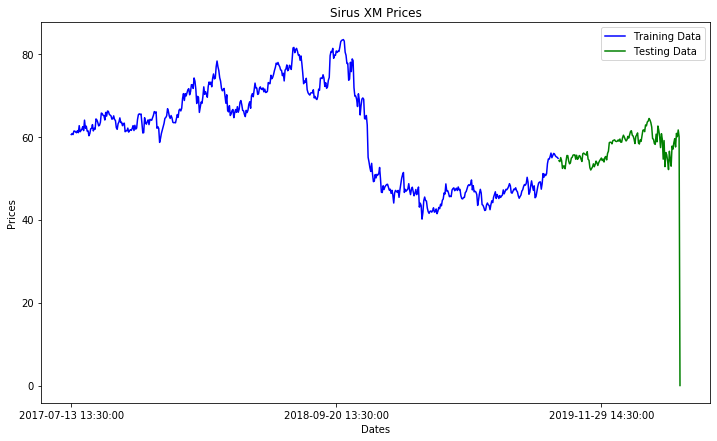

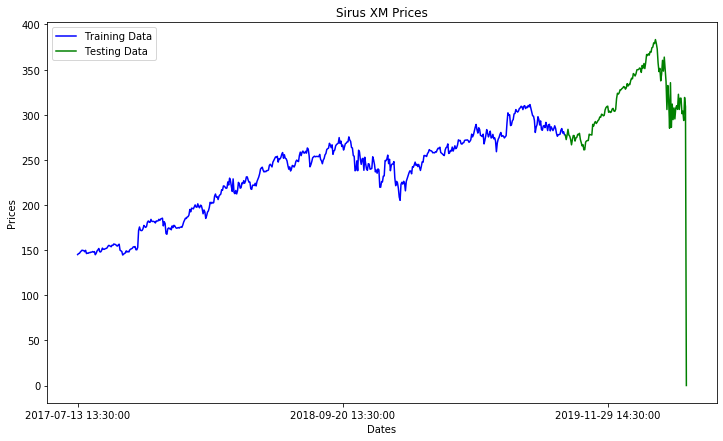

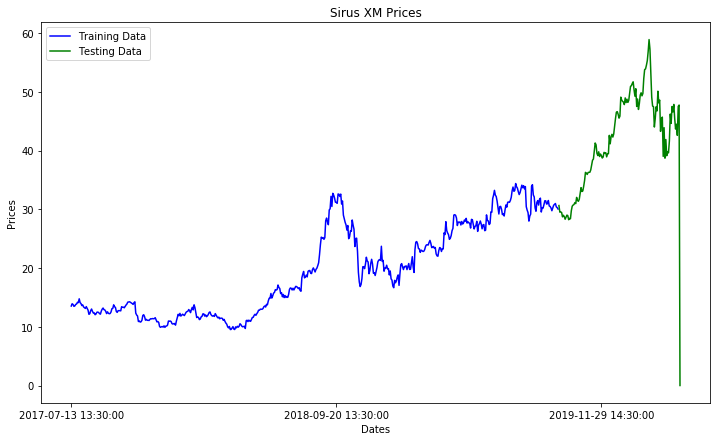

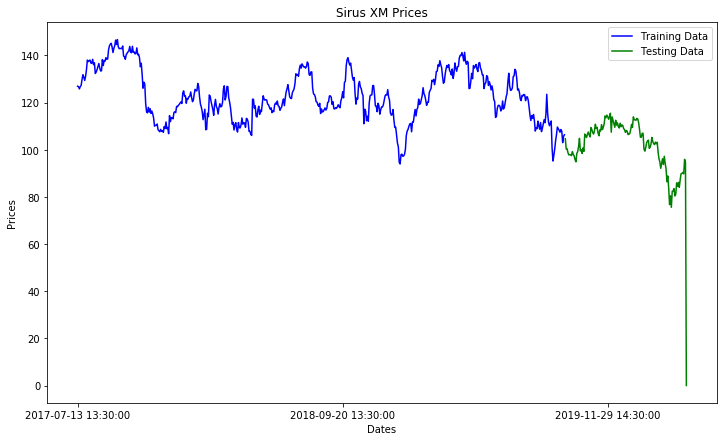

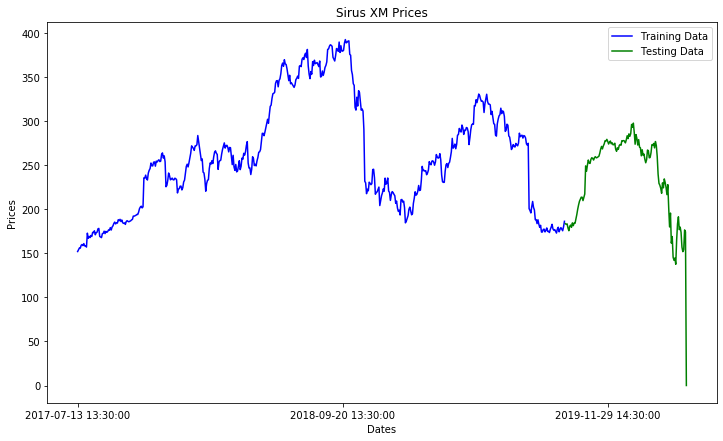

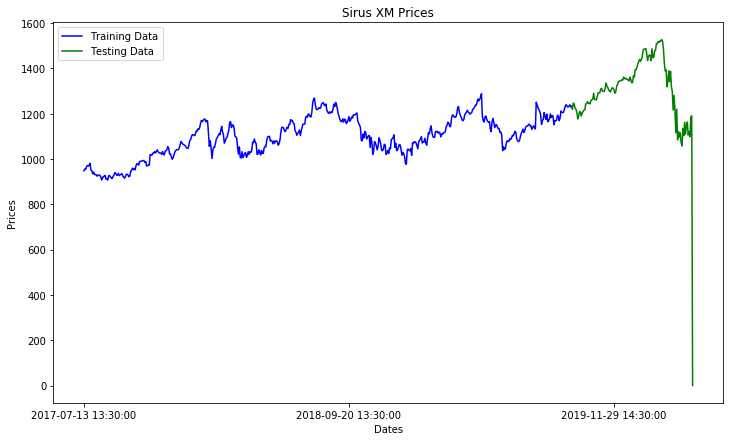

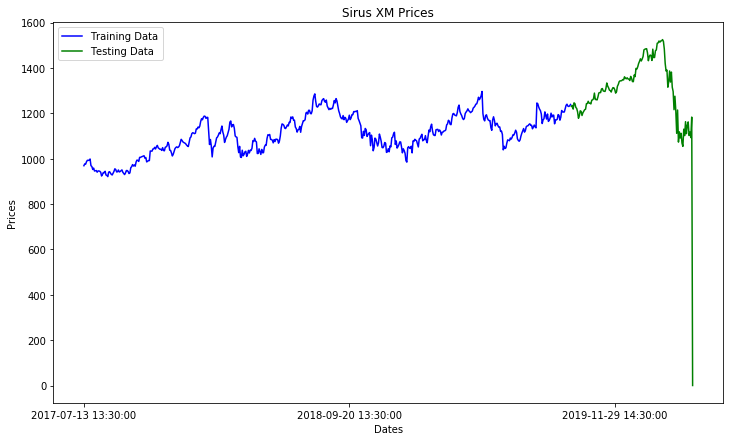

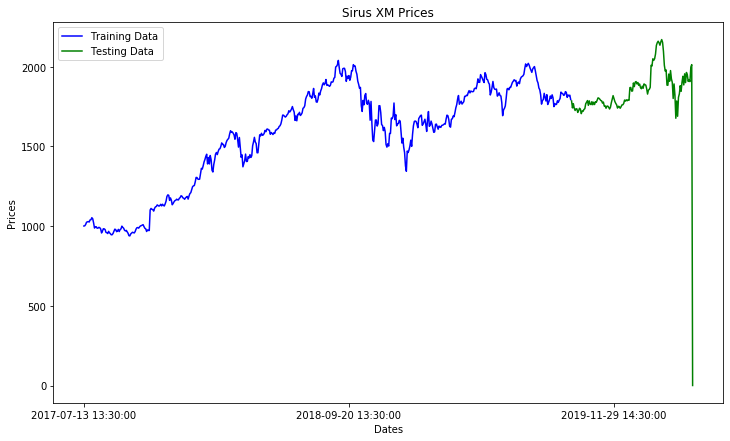

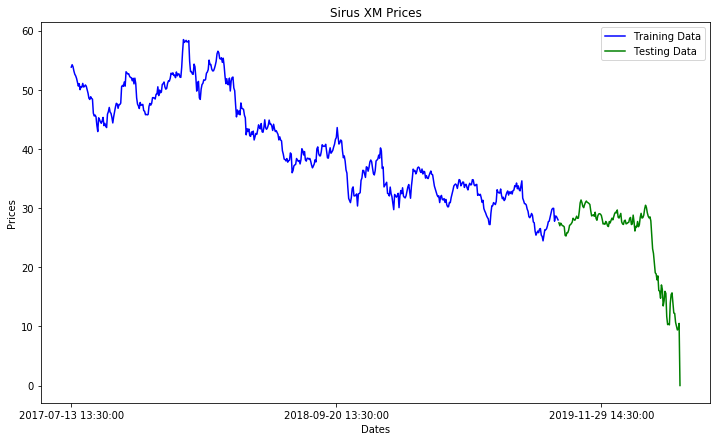

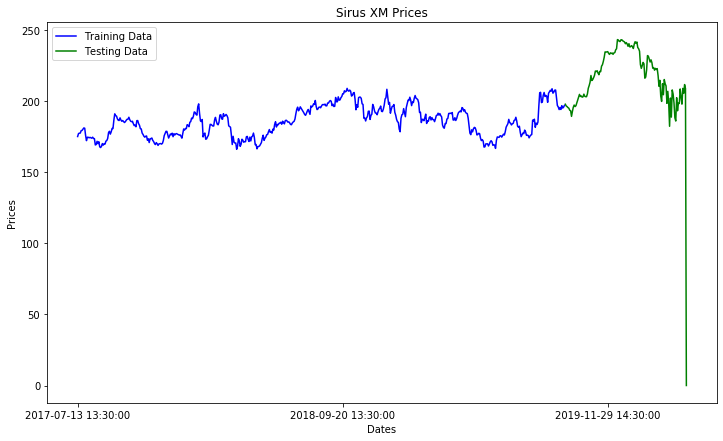

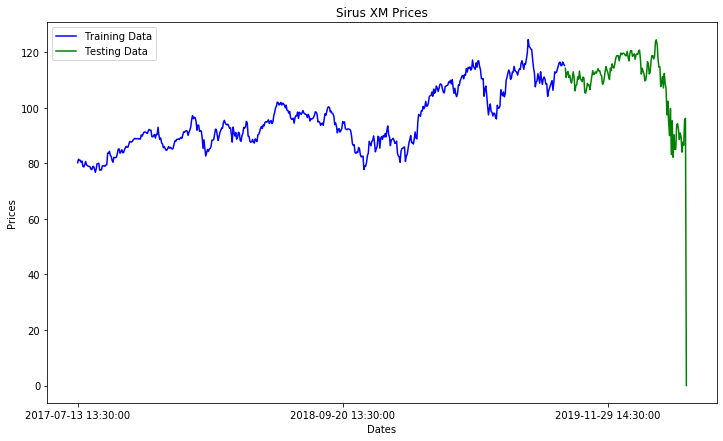

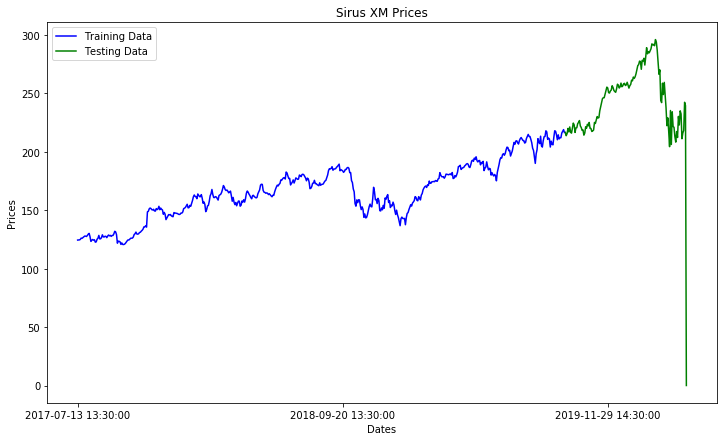

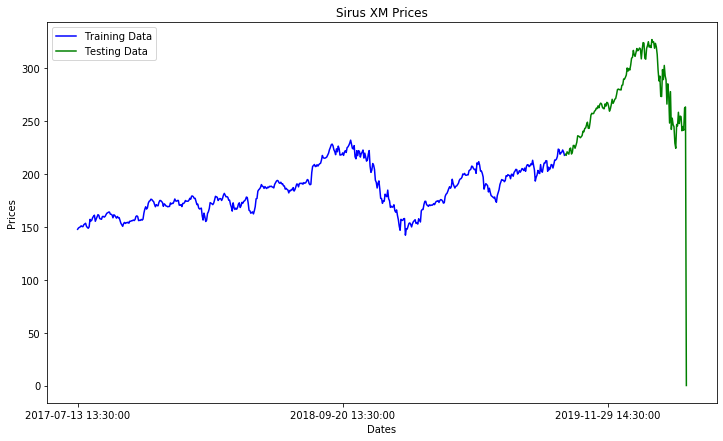

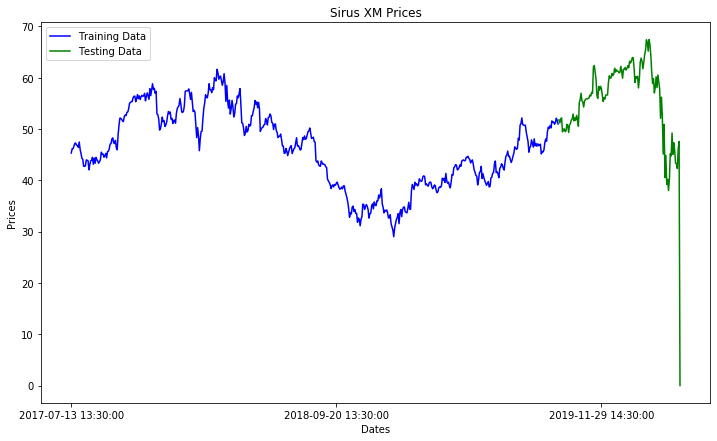

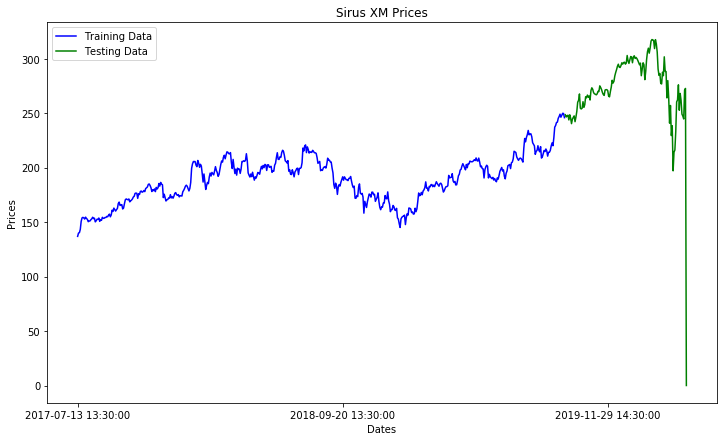

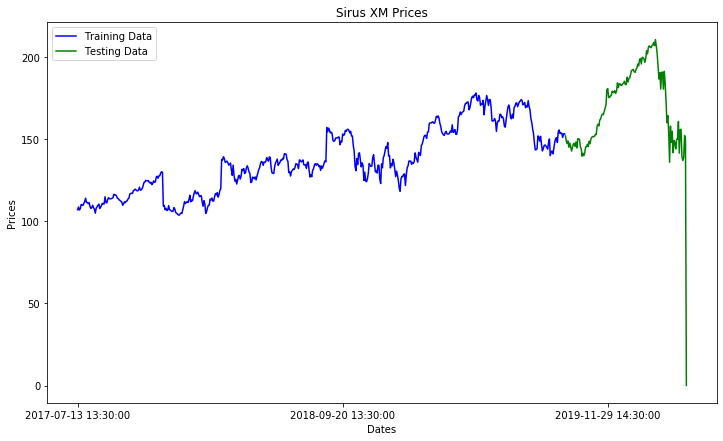

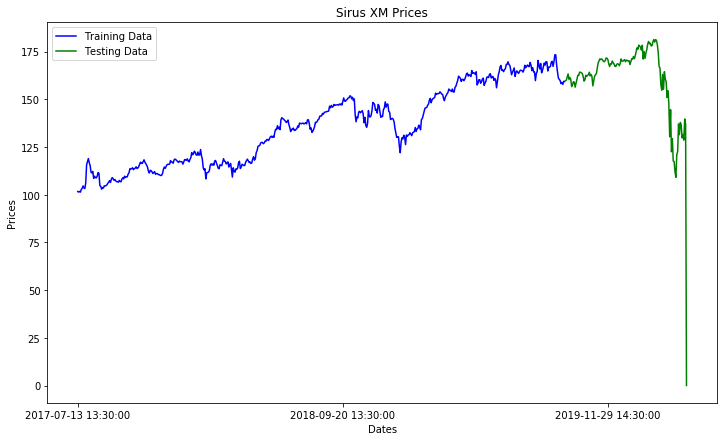

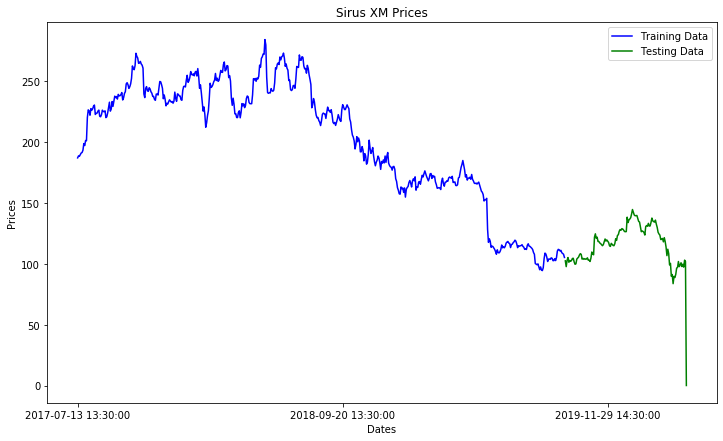

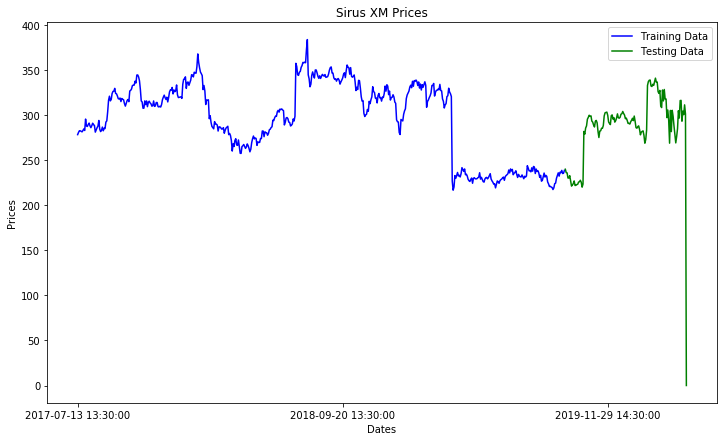

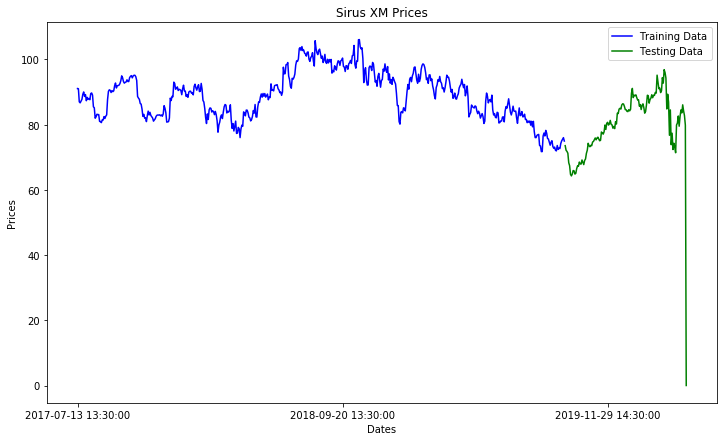

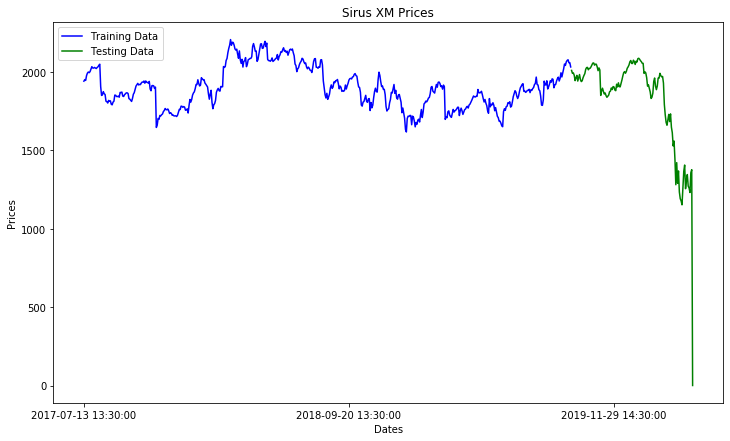

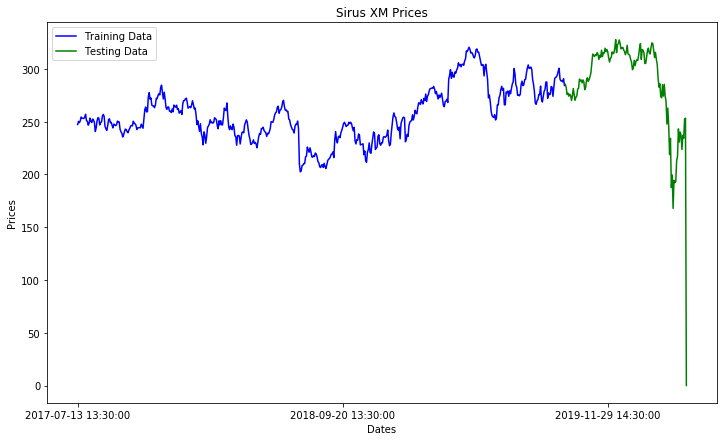

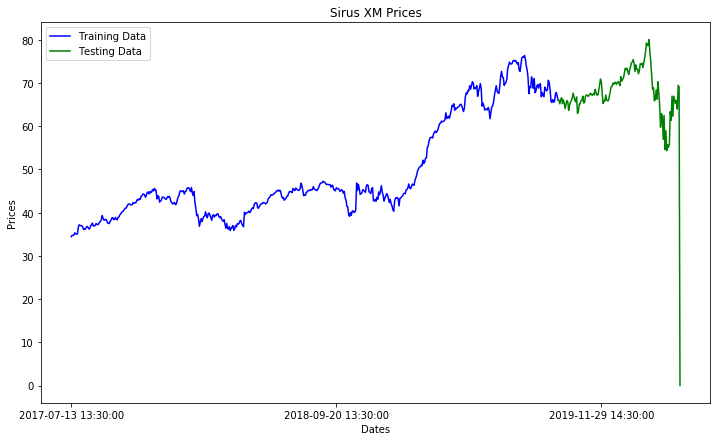

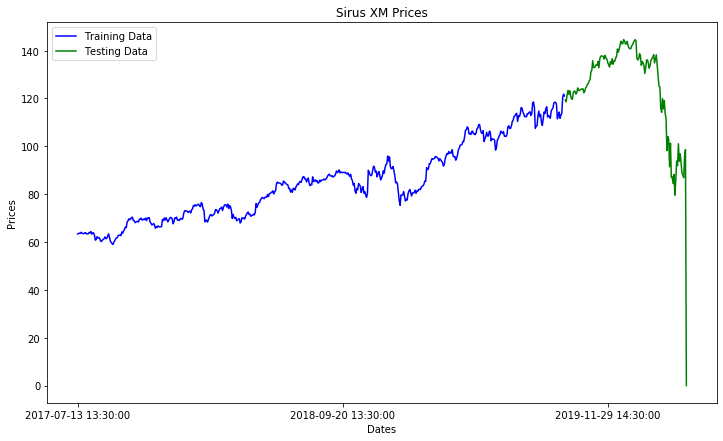

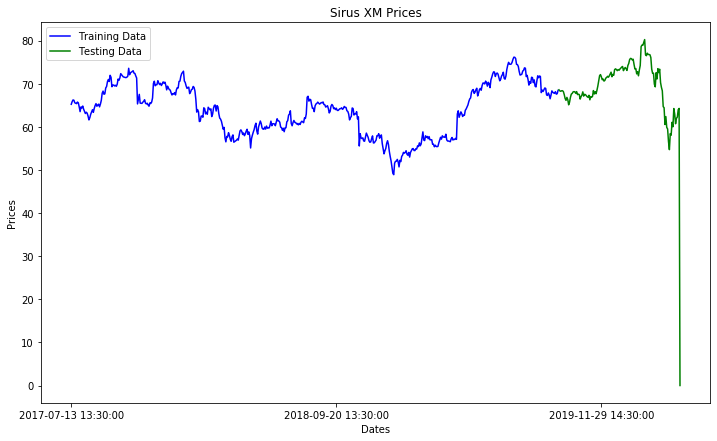

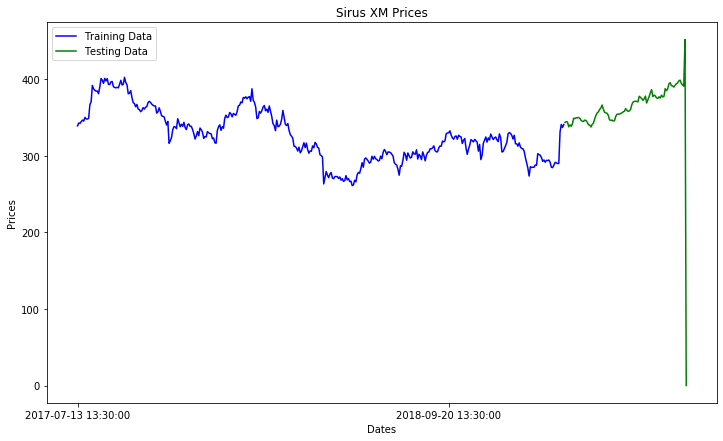

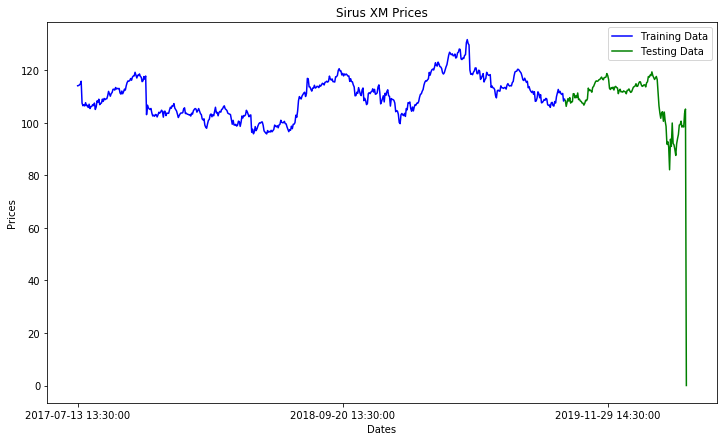

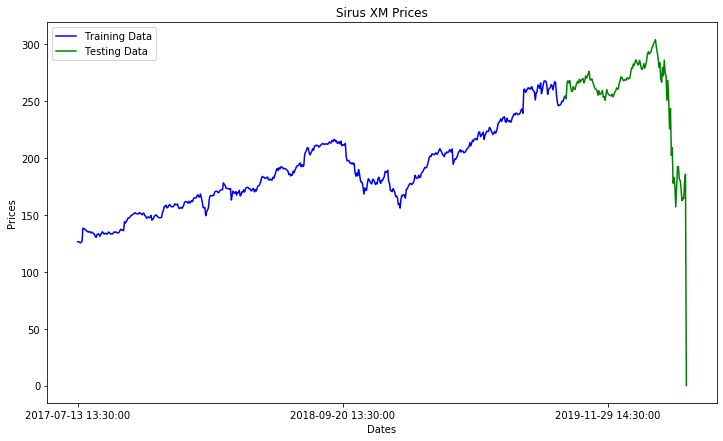

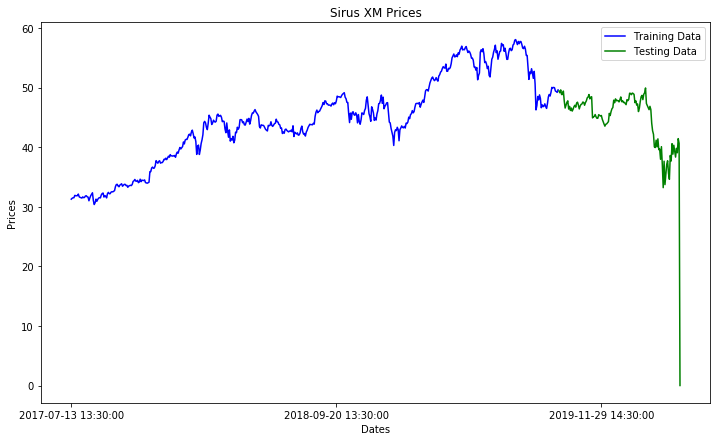

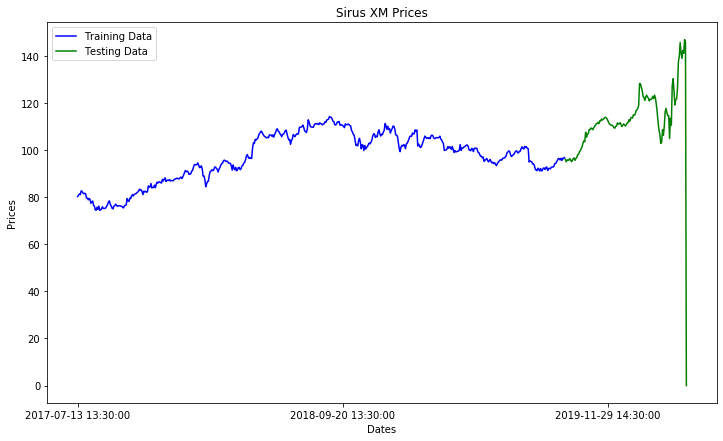

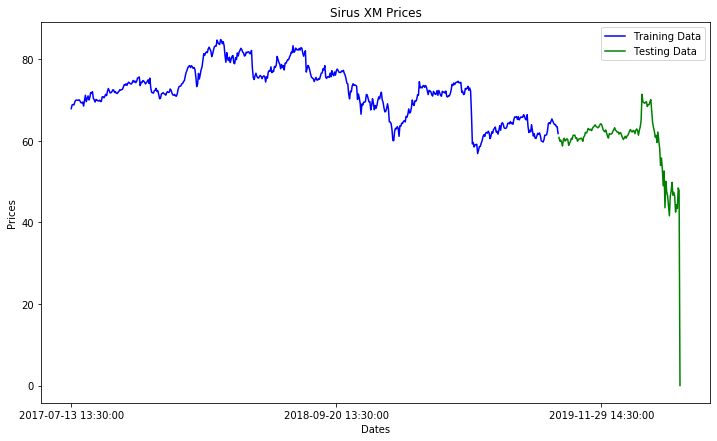

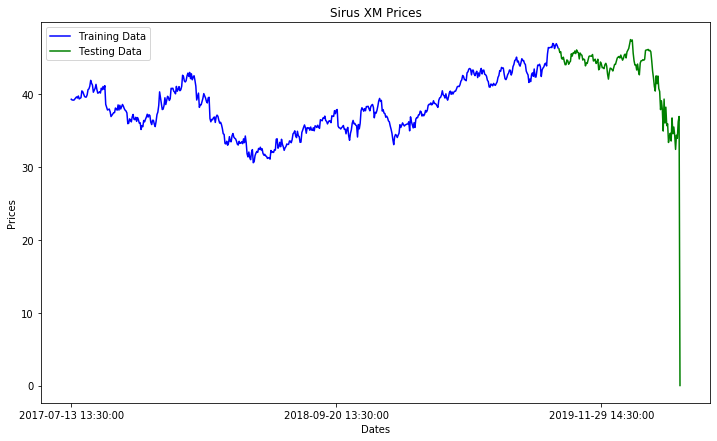

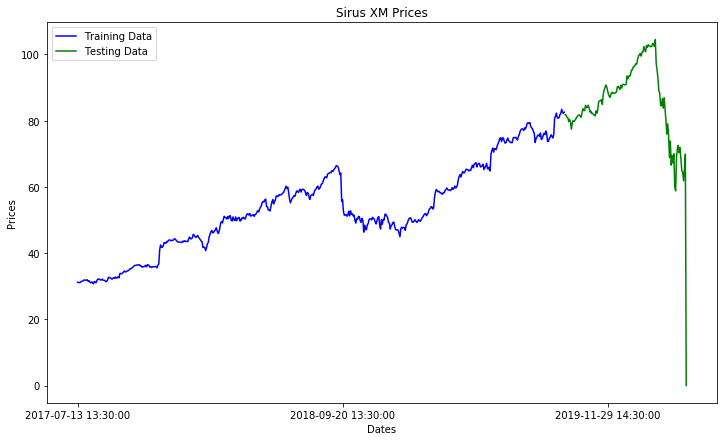

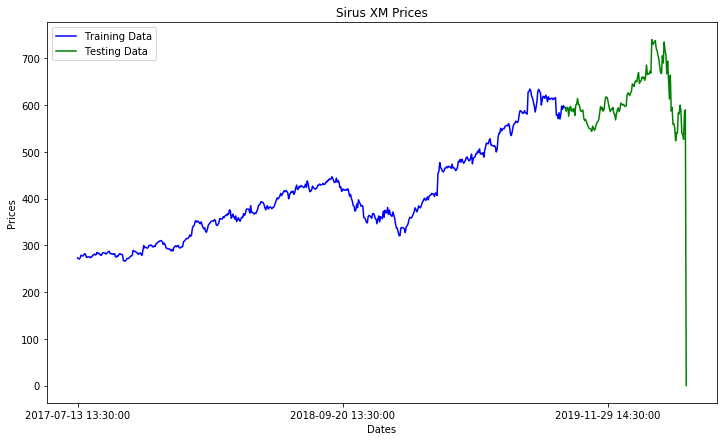

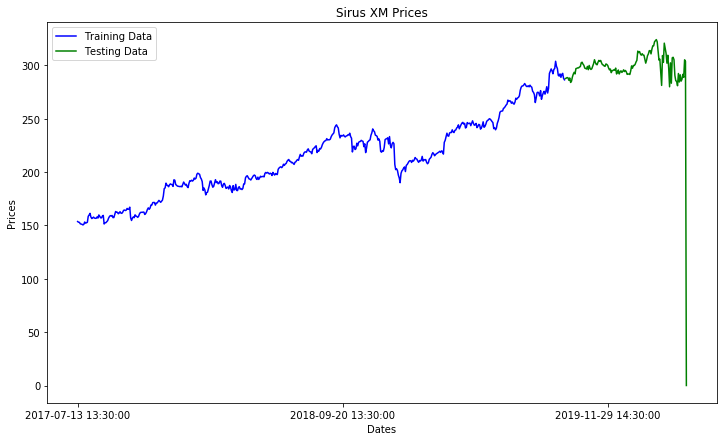

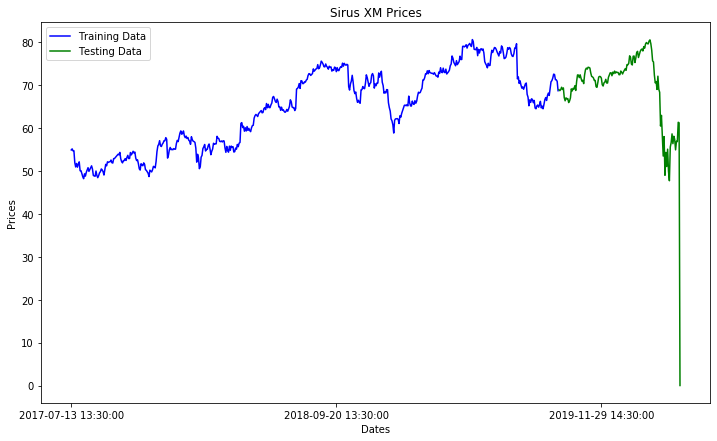

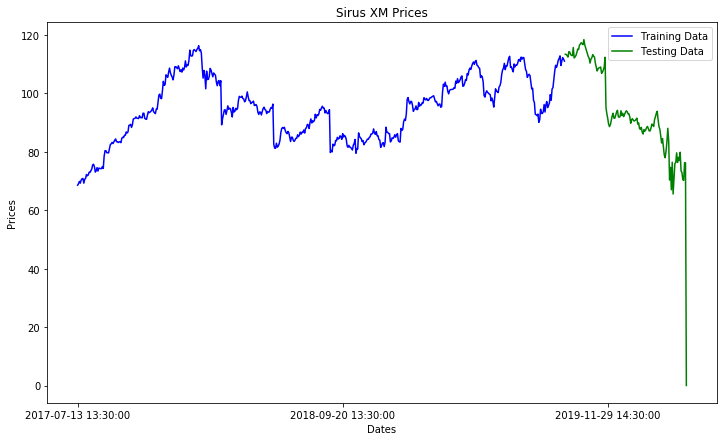

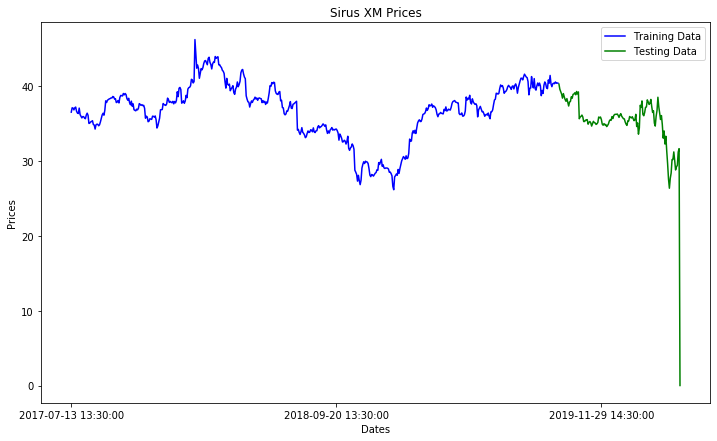

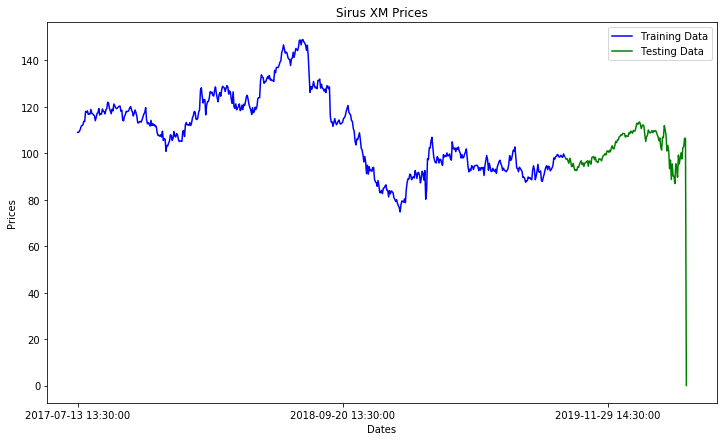

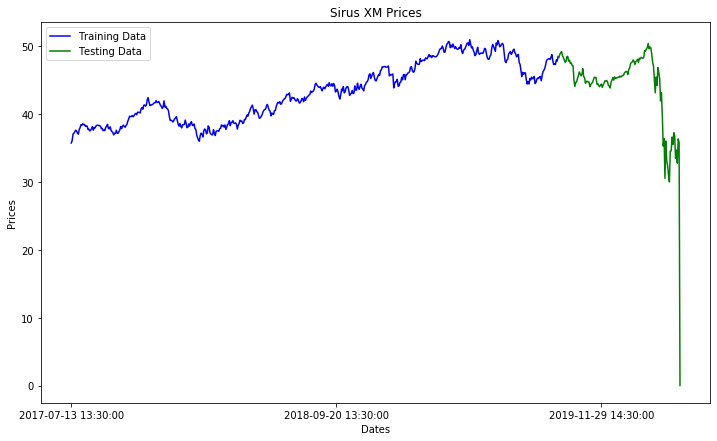

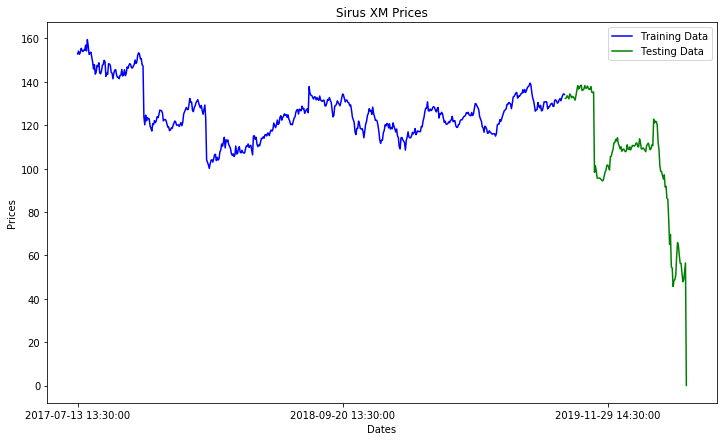

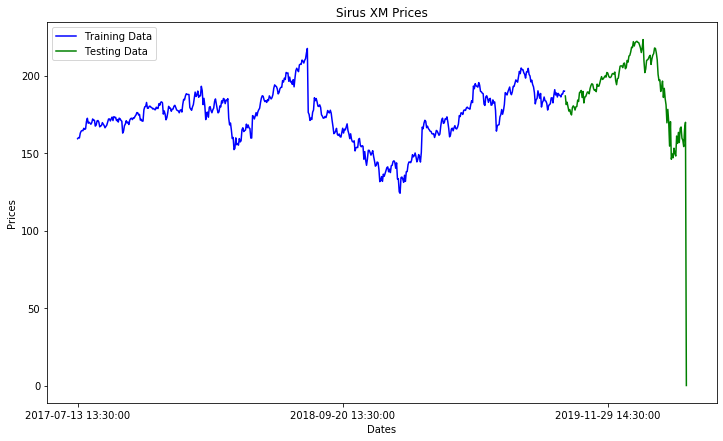

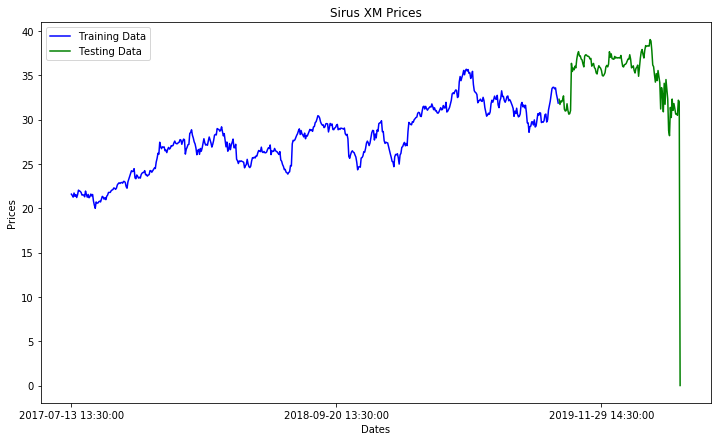

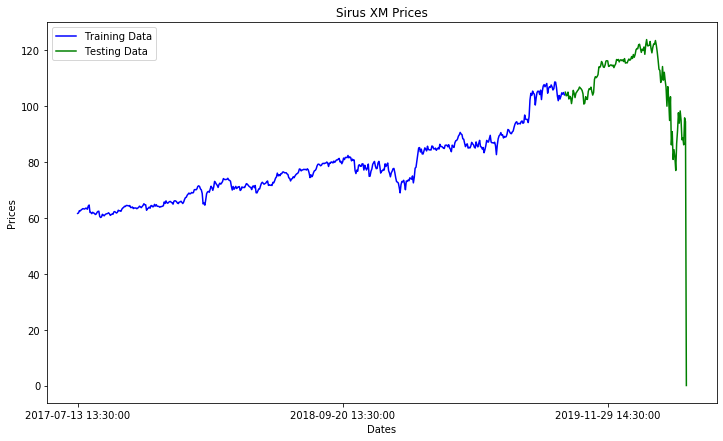

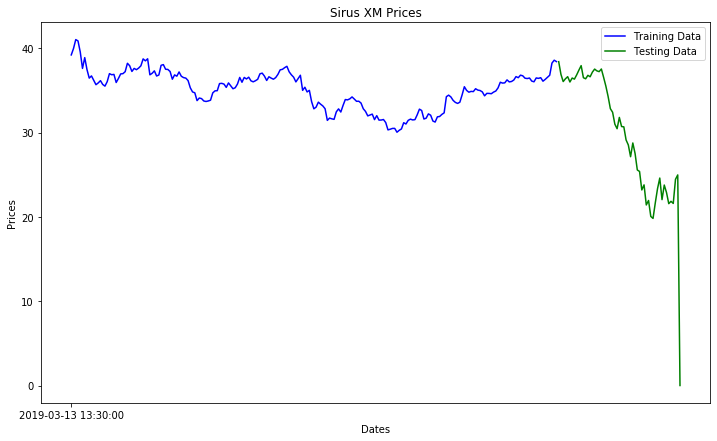

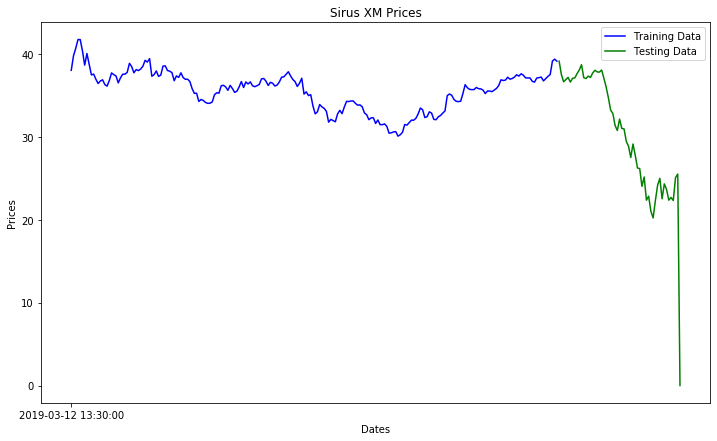

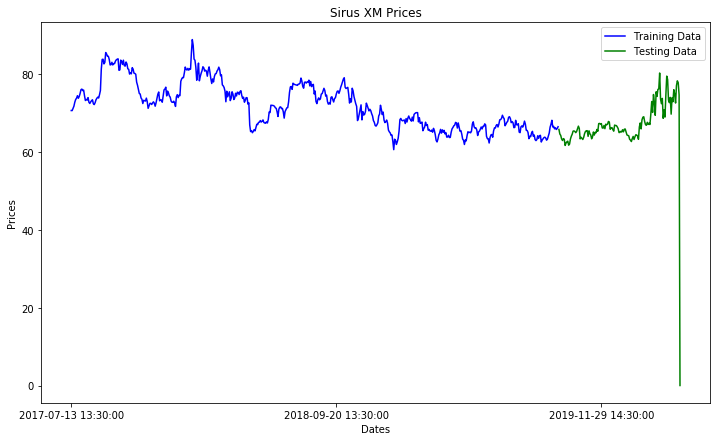

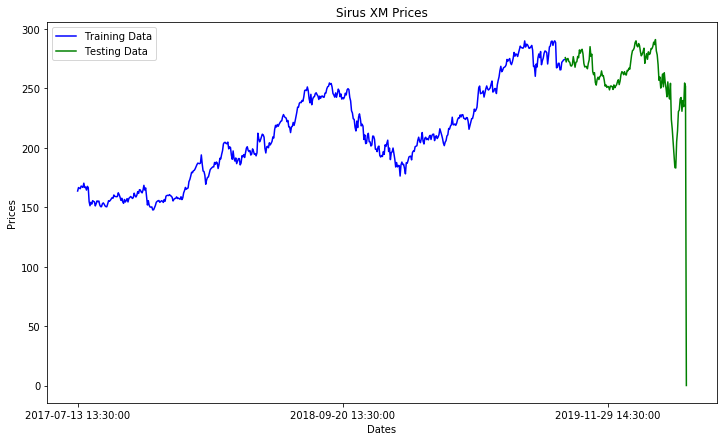

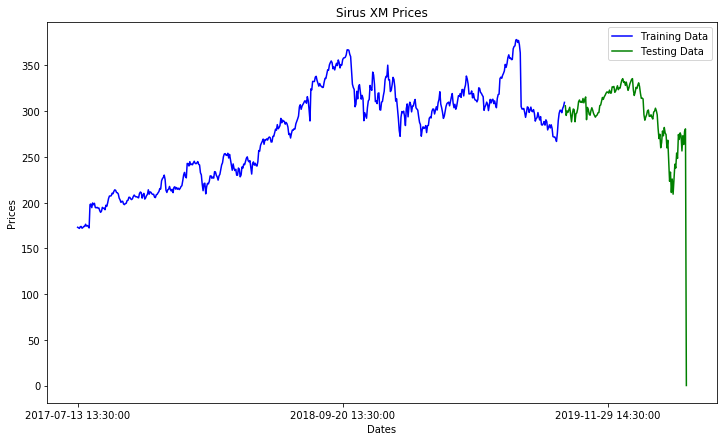

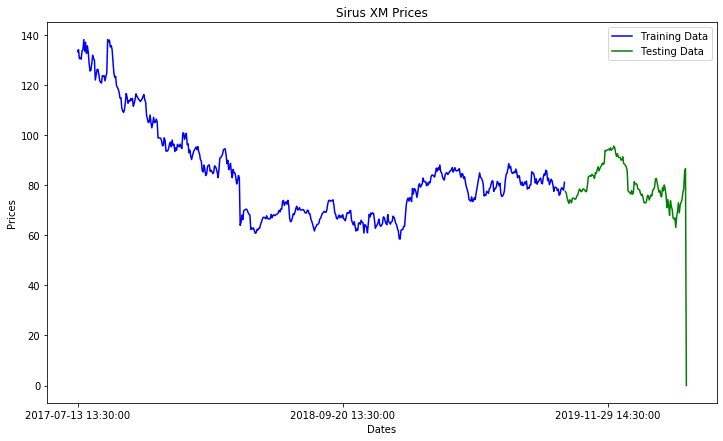

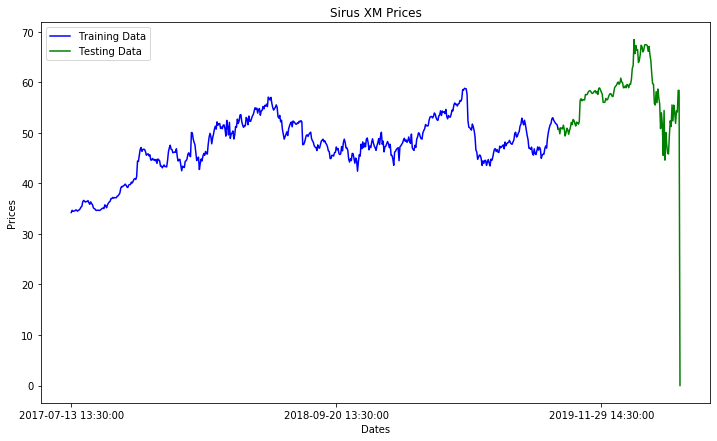

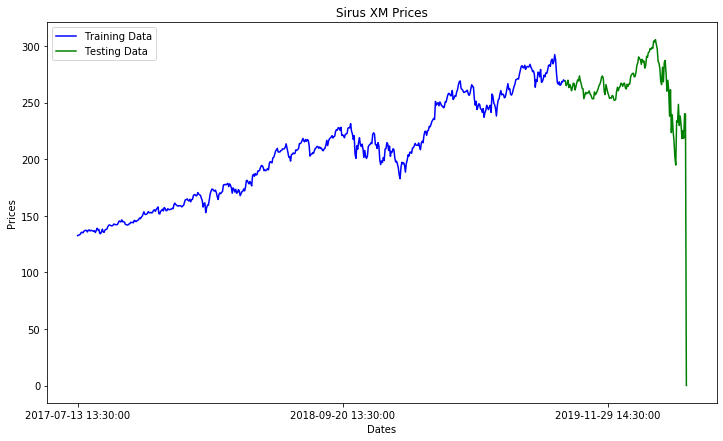

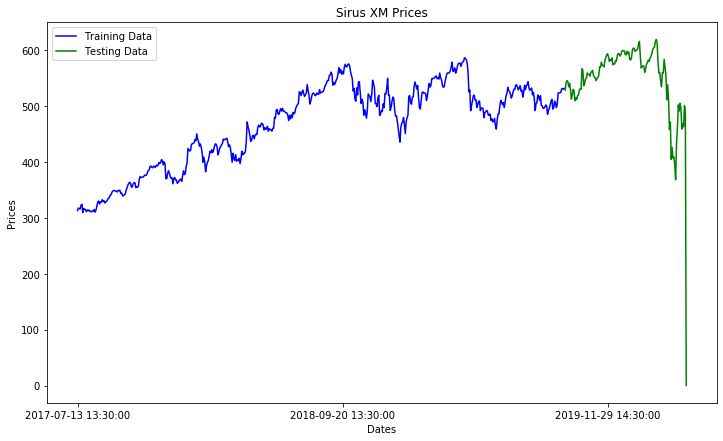

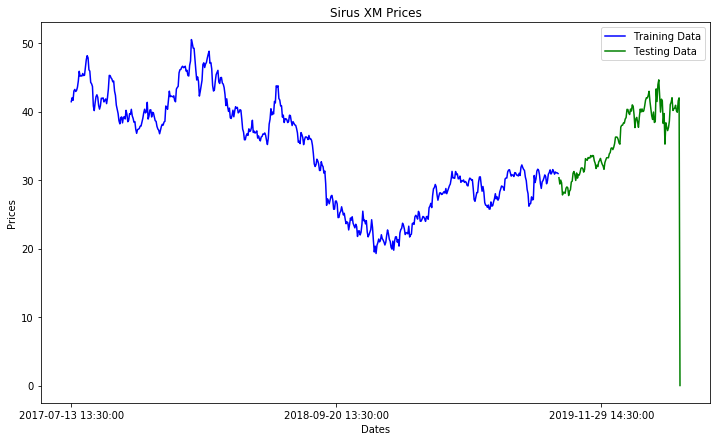

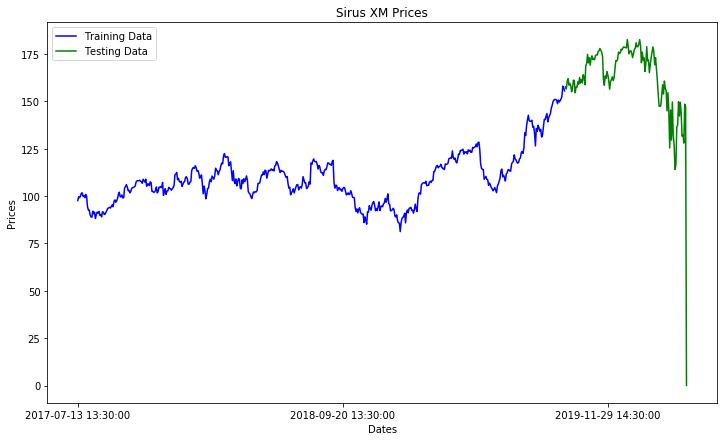

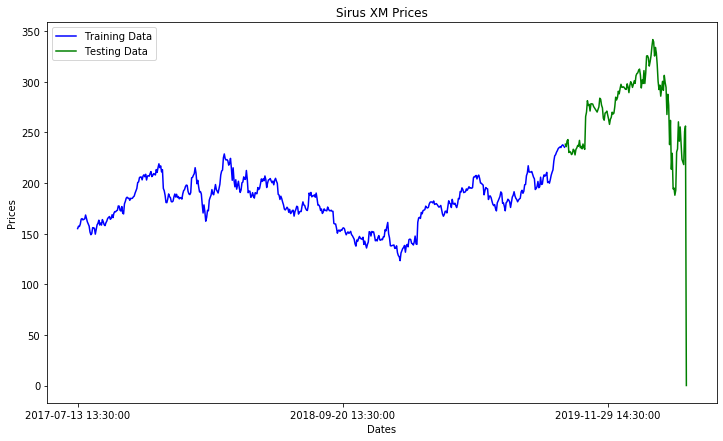

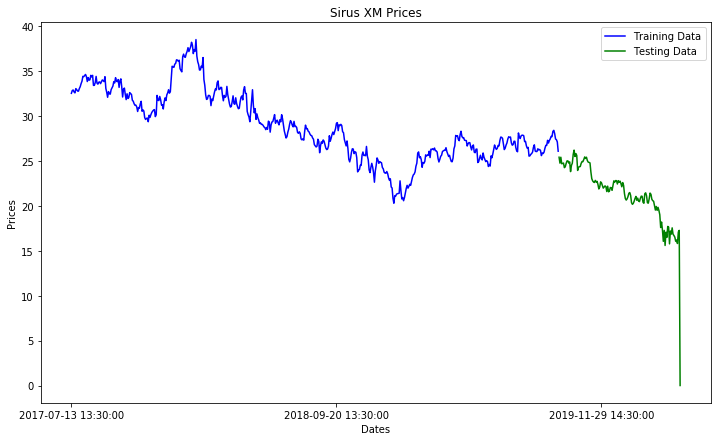

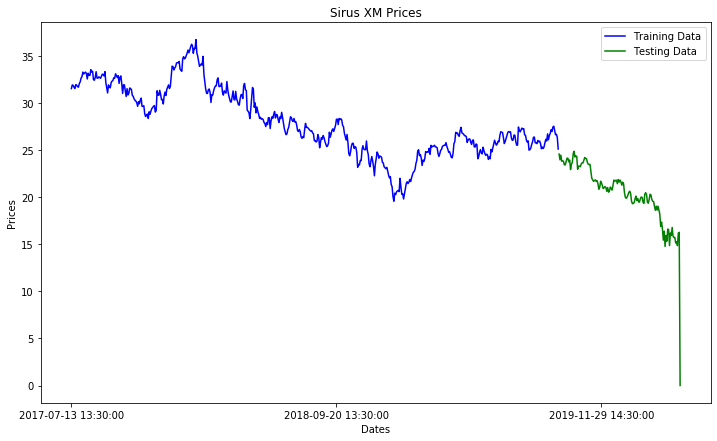

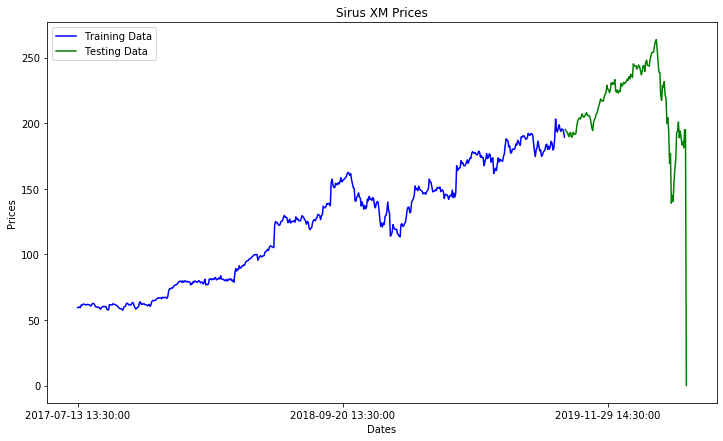

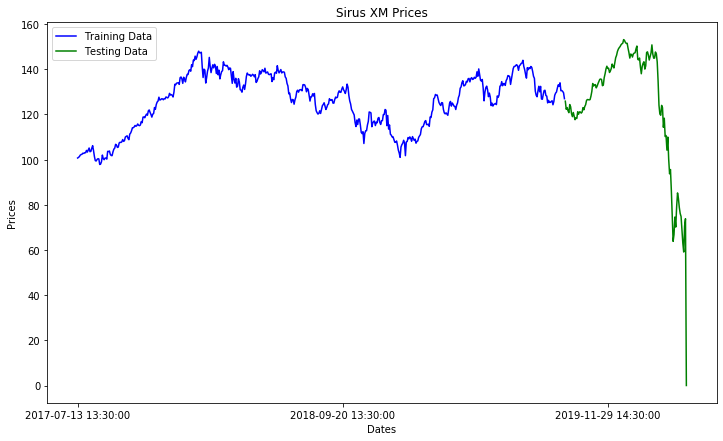

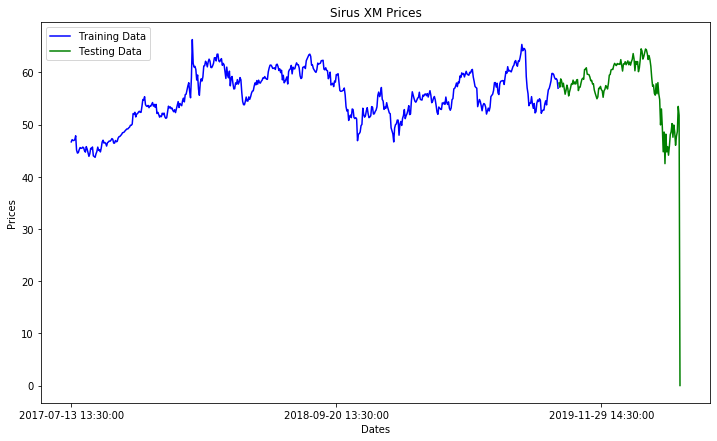

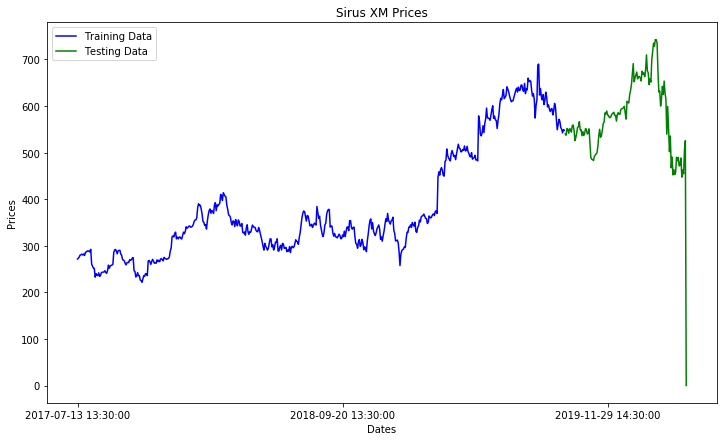

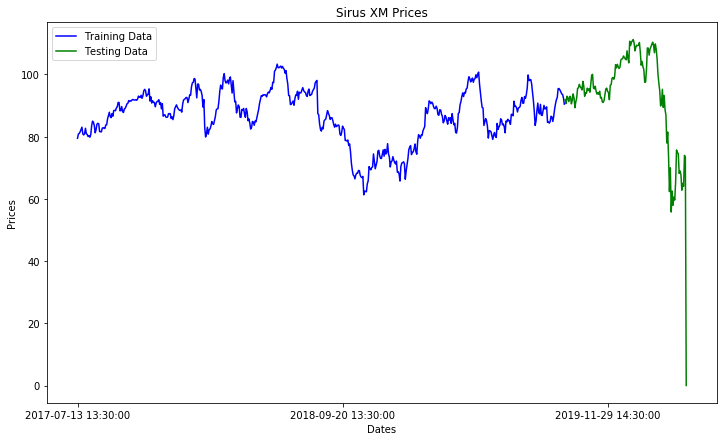

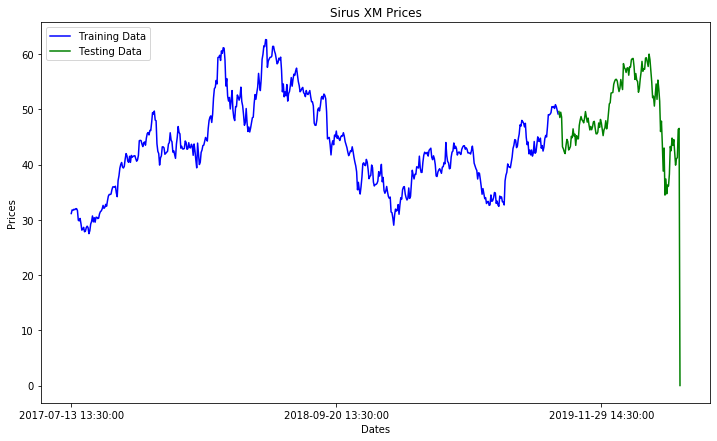

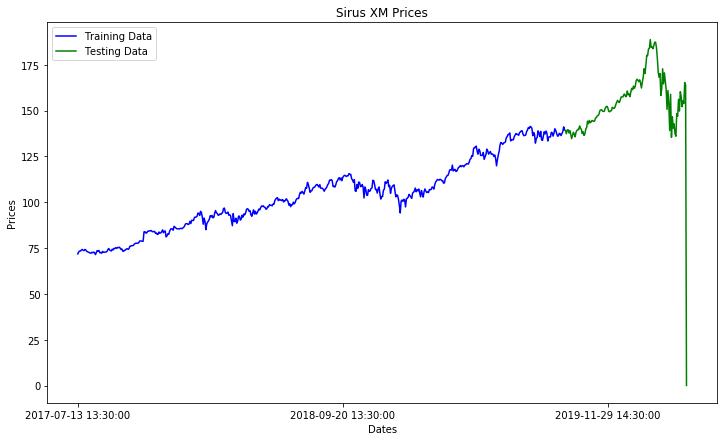

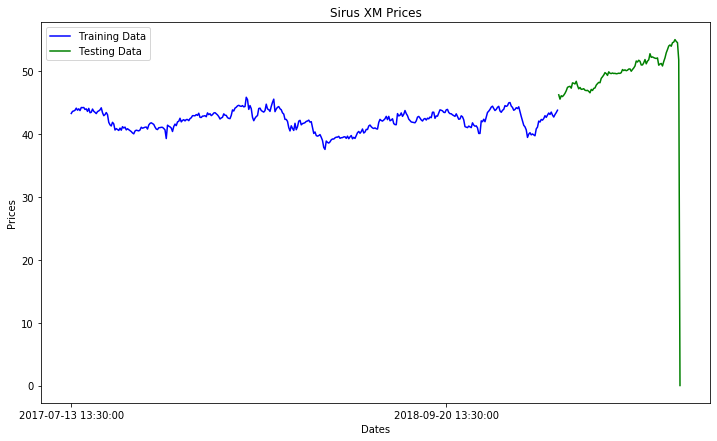

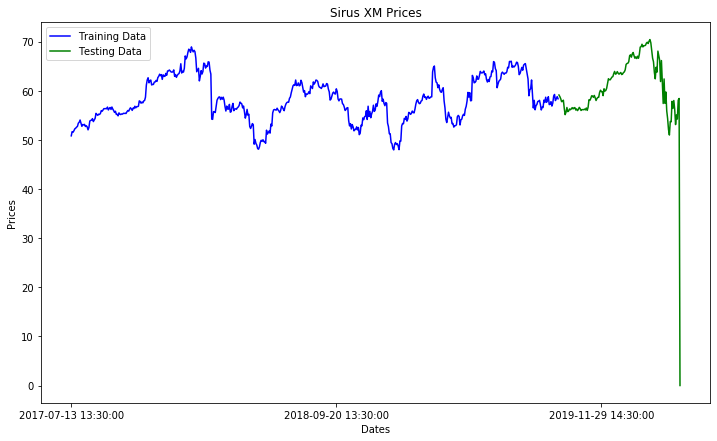

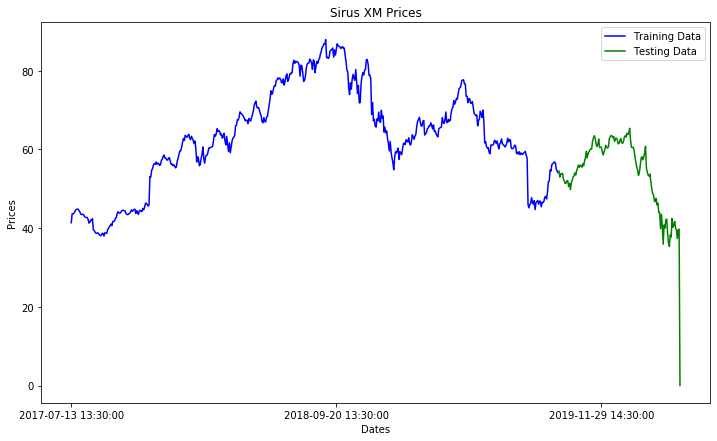

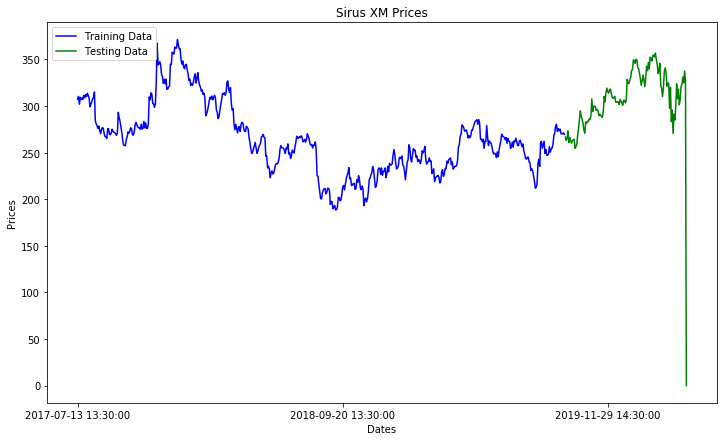

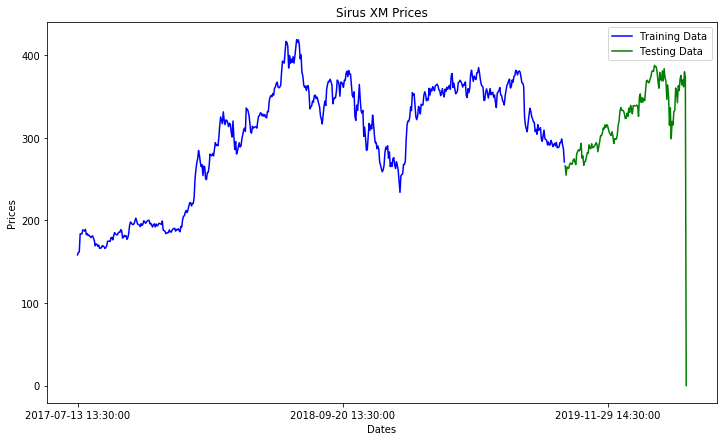

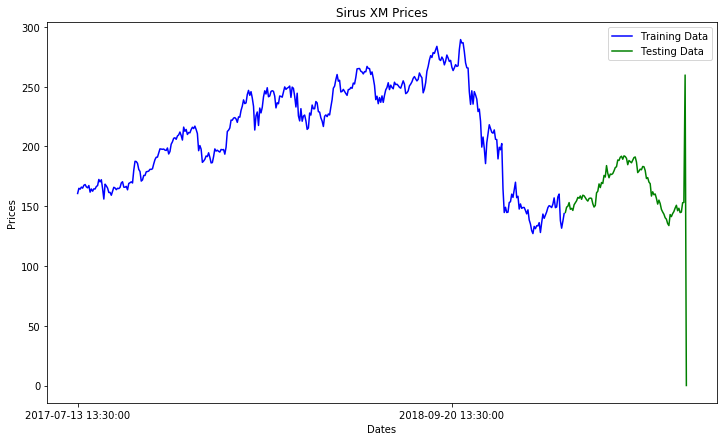

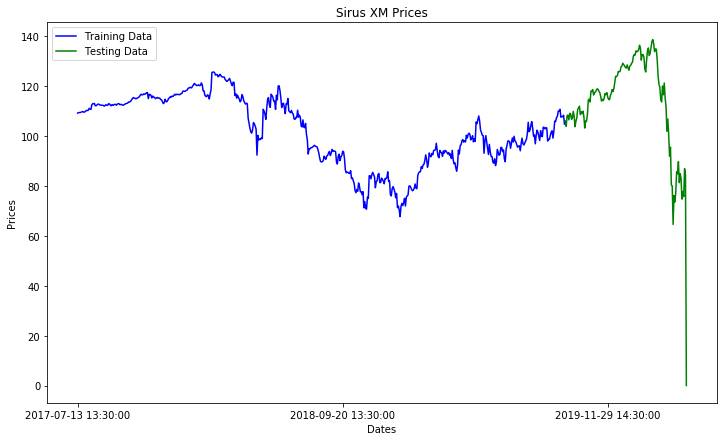

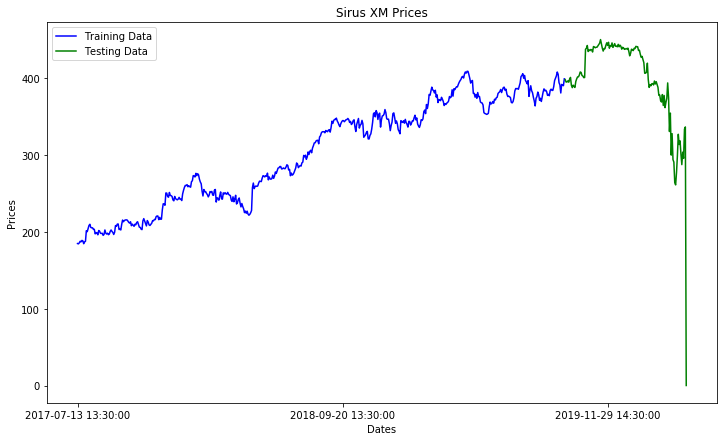

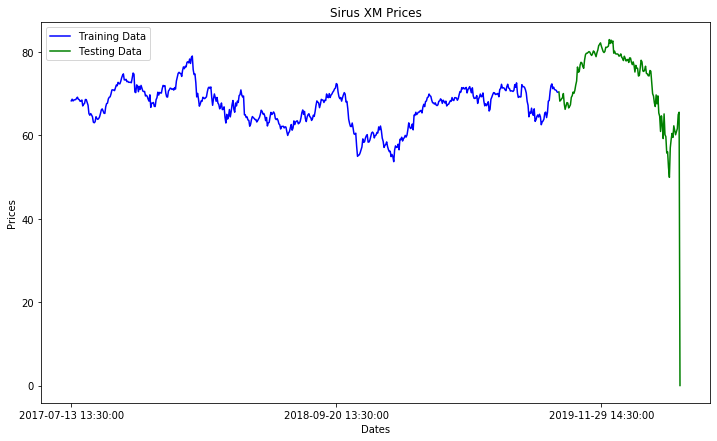

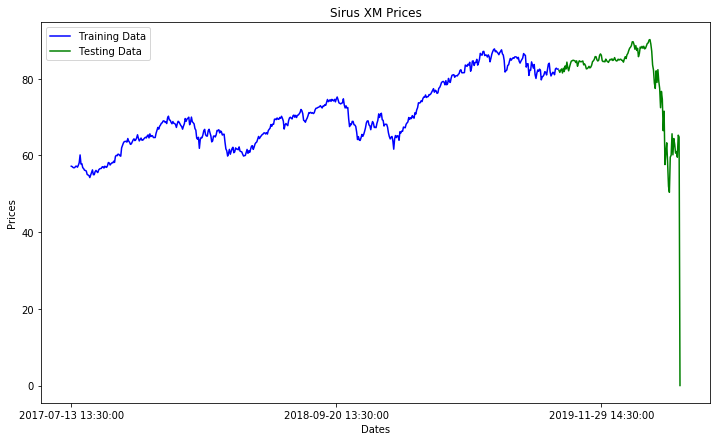

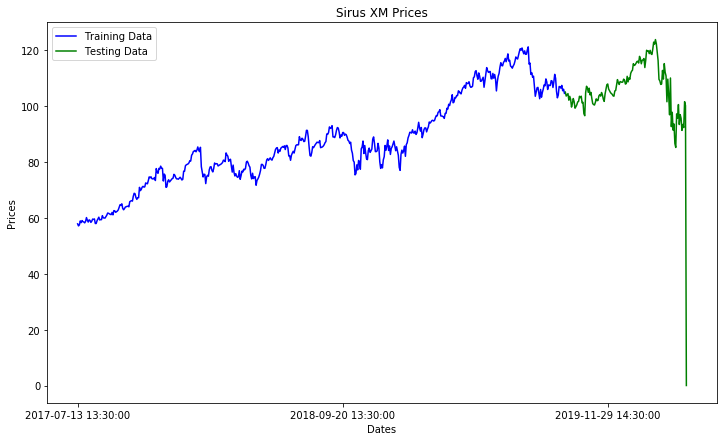

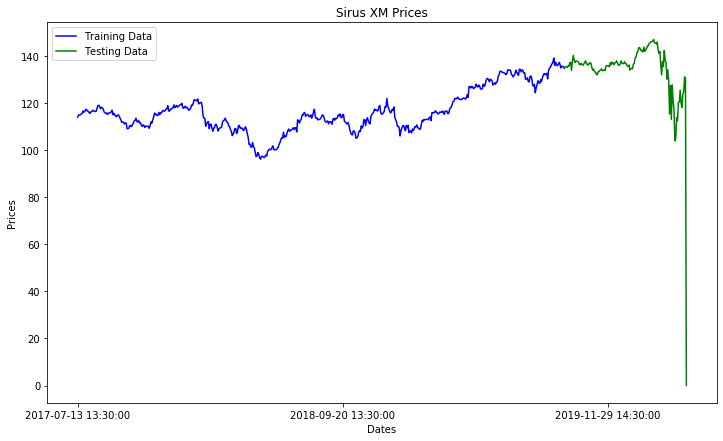

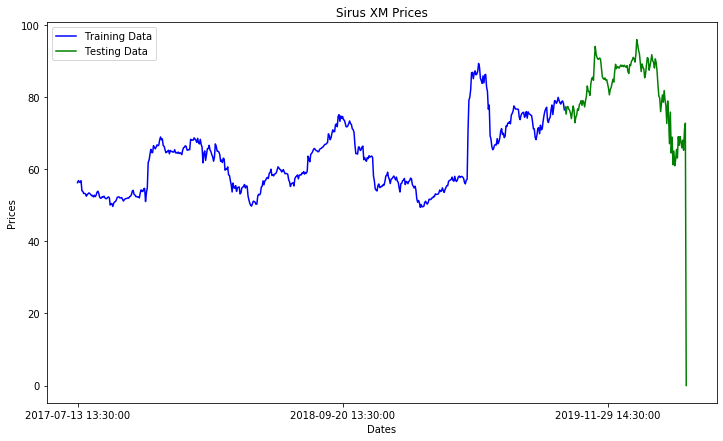

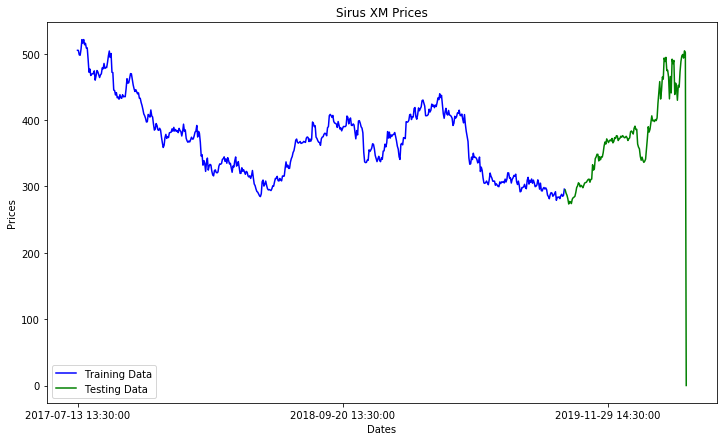

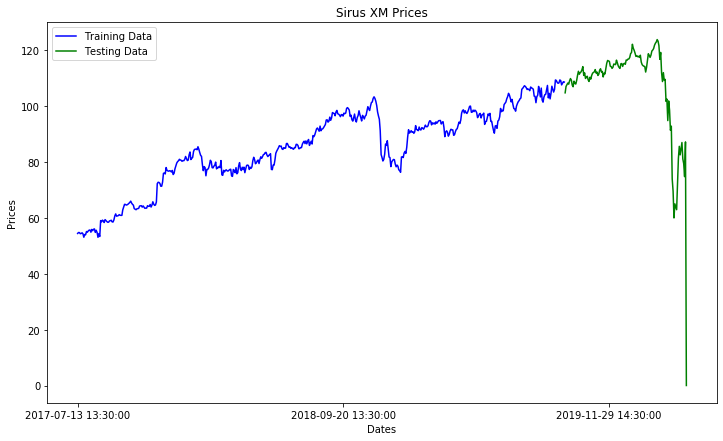

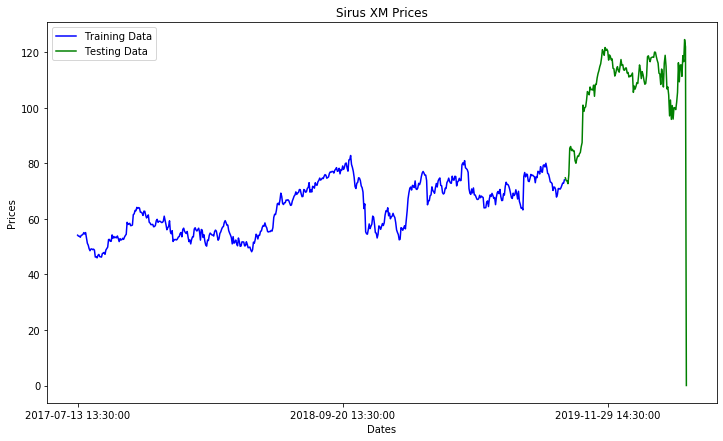

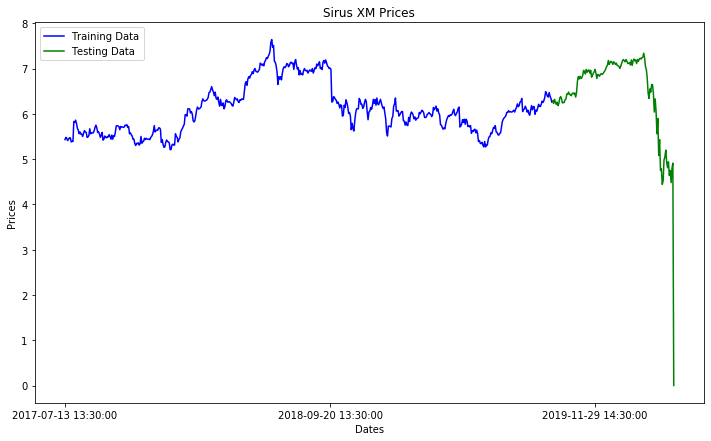

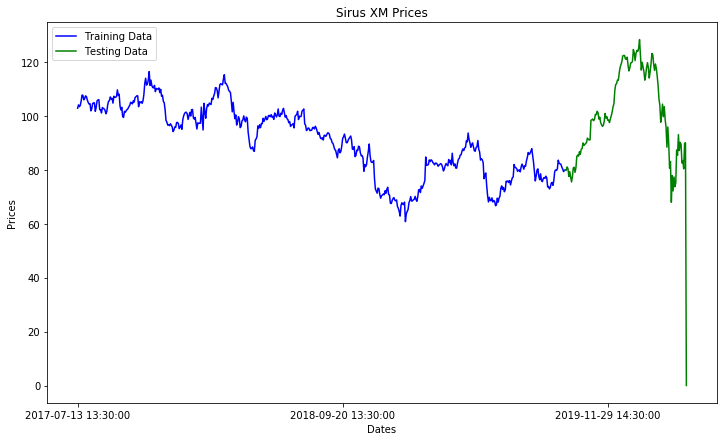

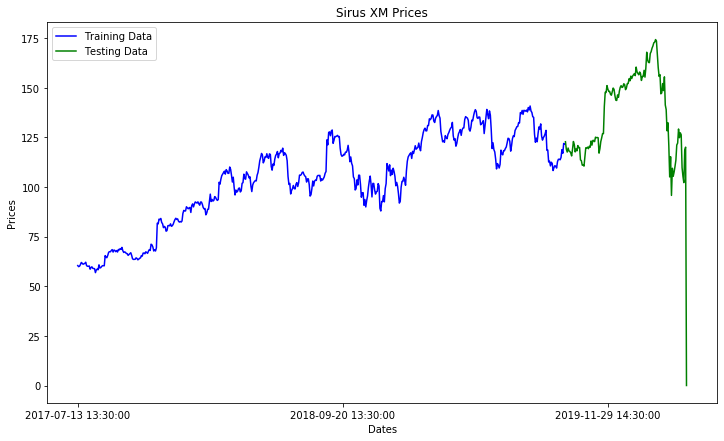

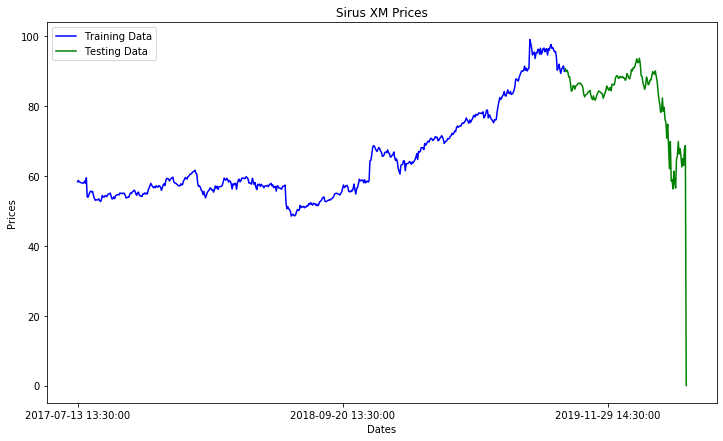

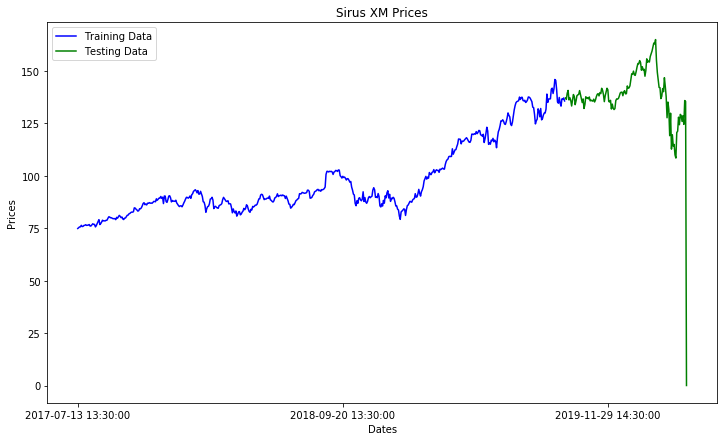

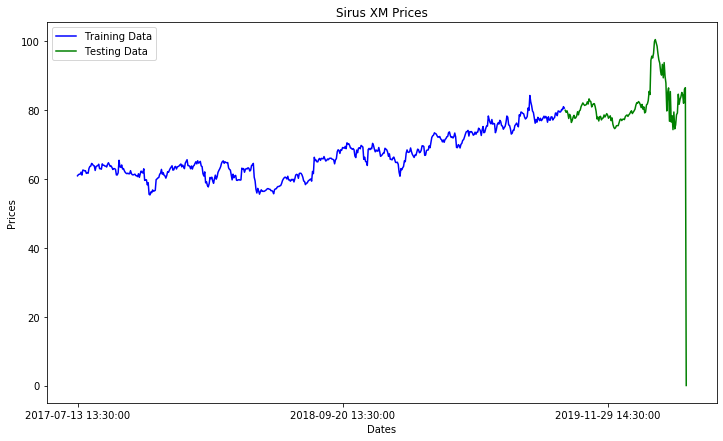

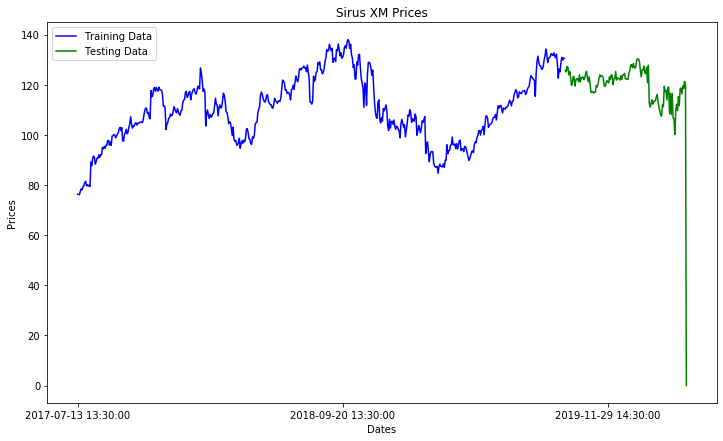

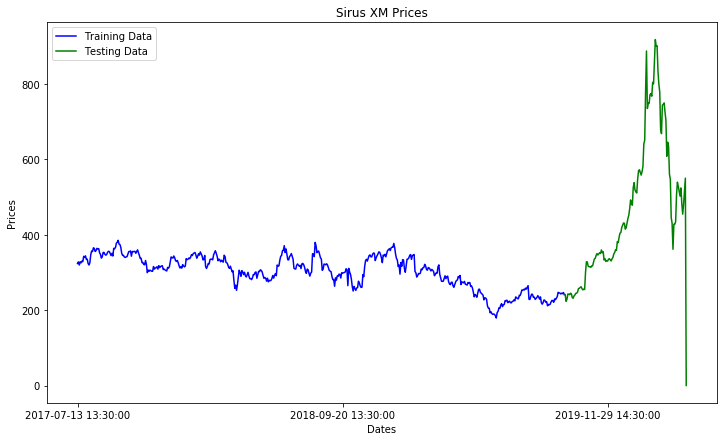

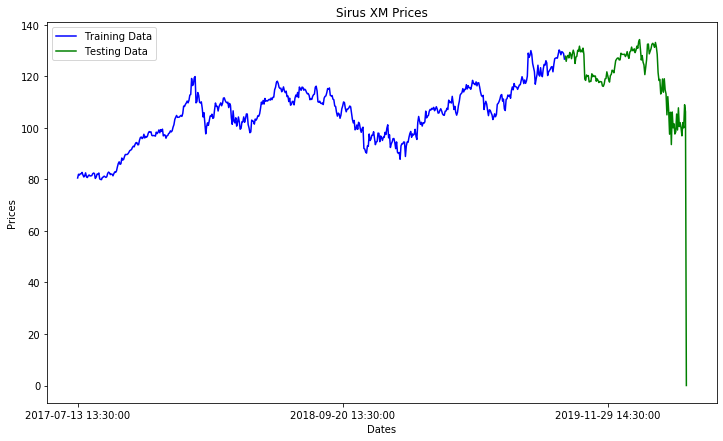

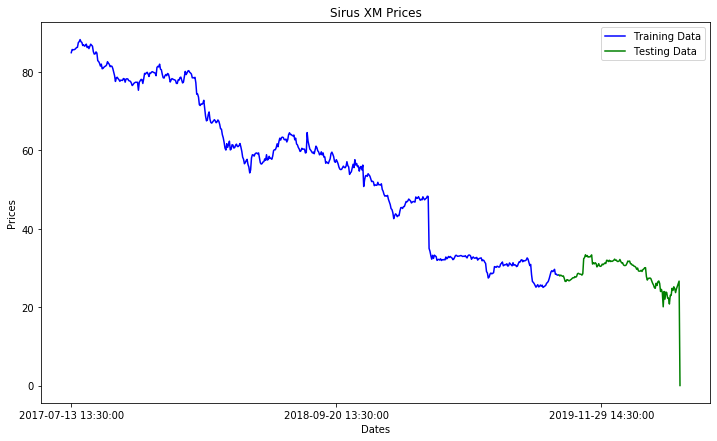

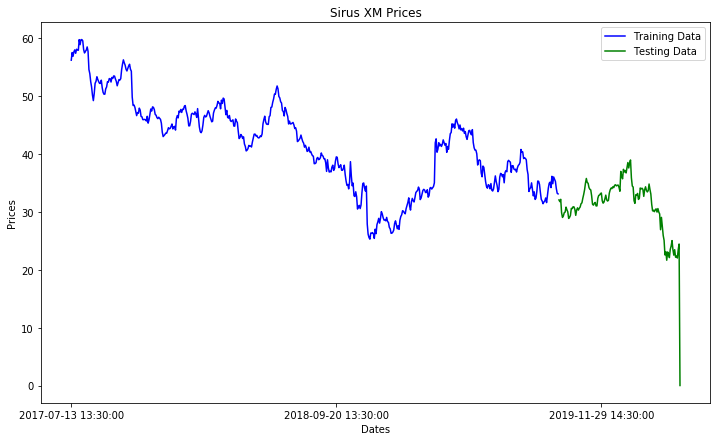

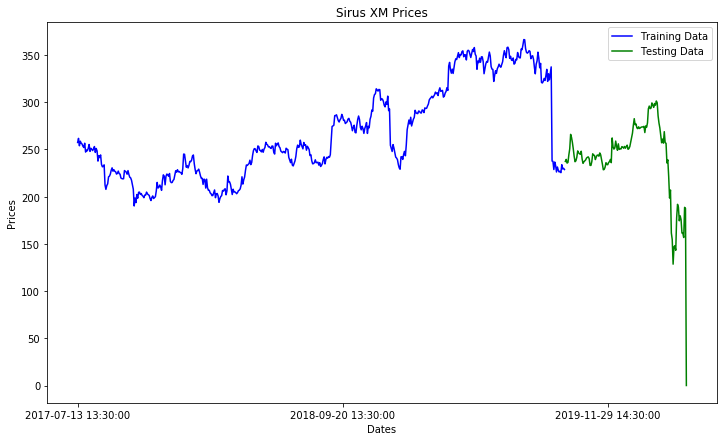

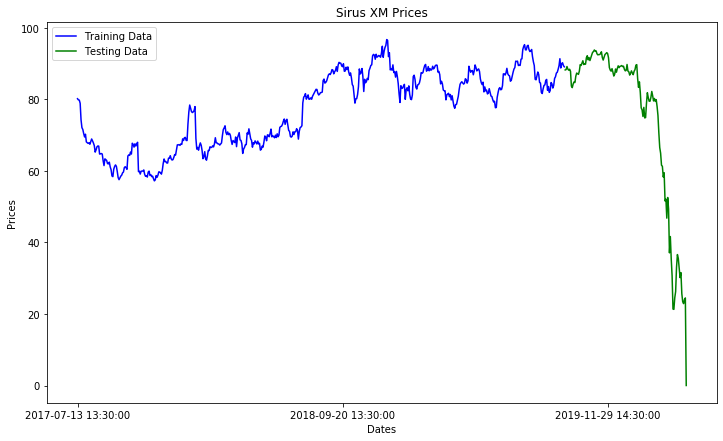

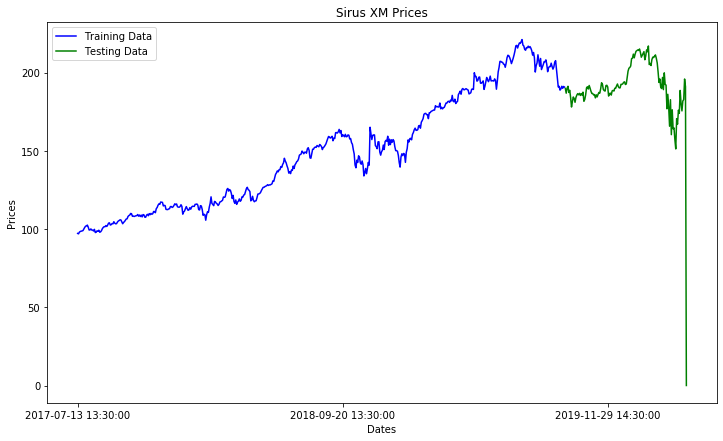

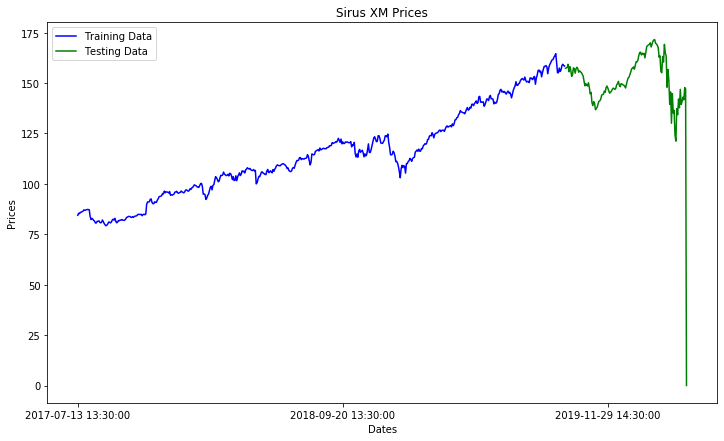

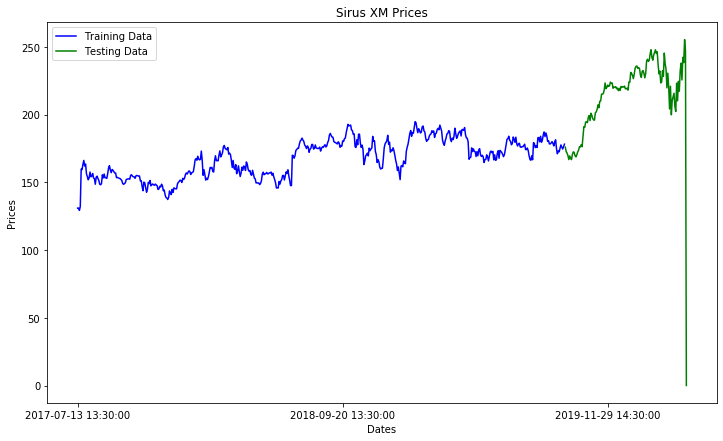

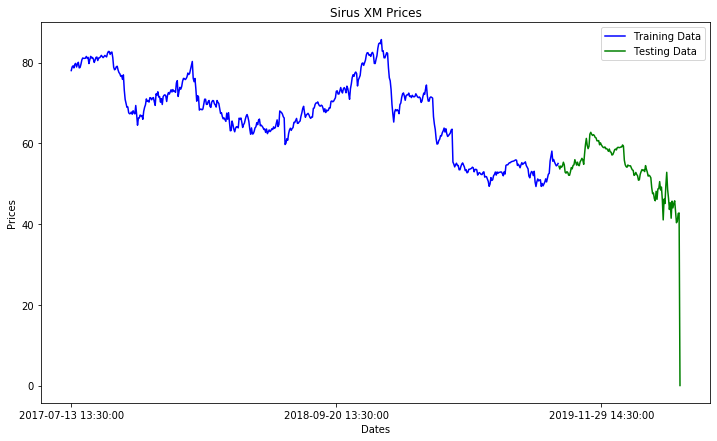

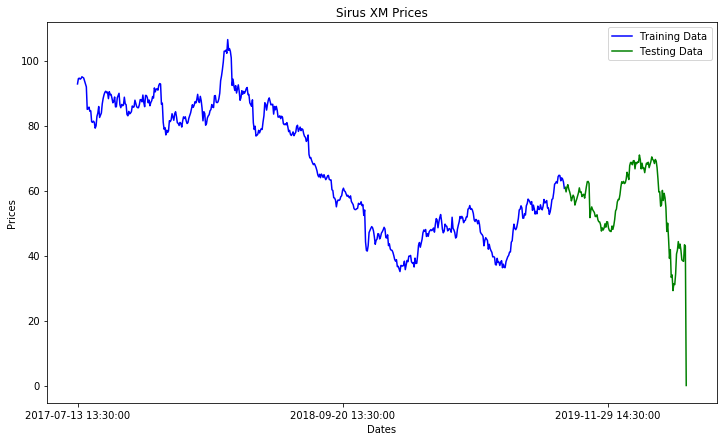

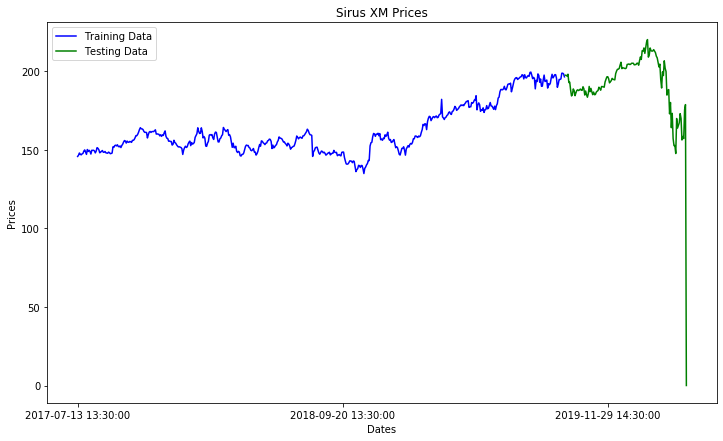

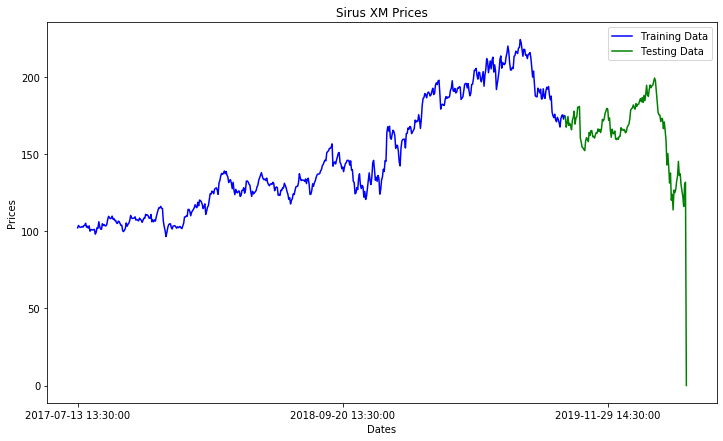

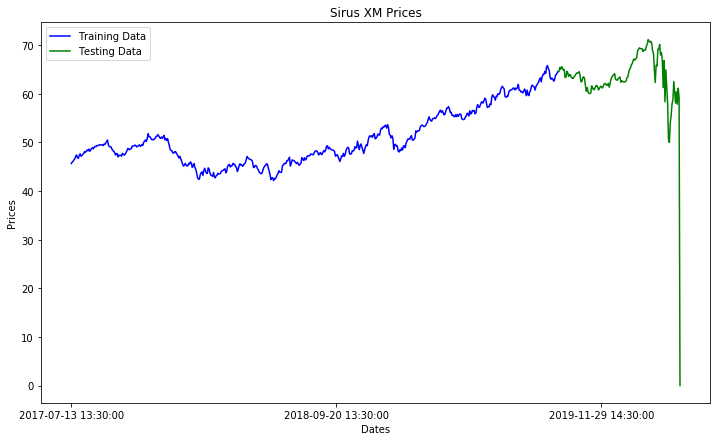

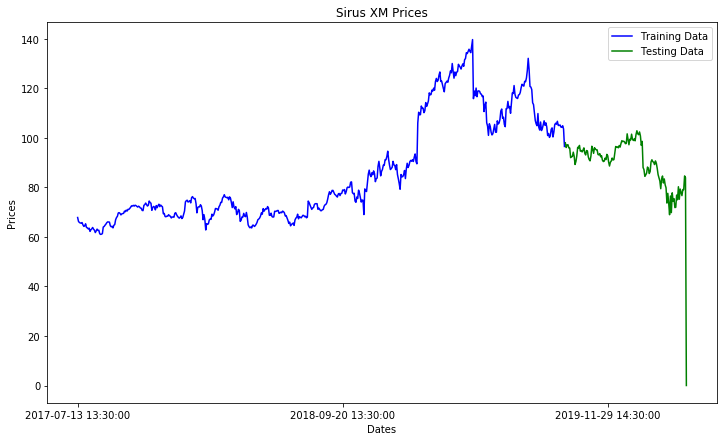

In [15]:
for i in data_list:
    
    #Printing which stock running currently
    print(i) 
    df = pd.read_json (r"raw_json/"+i+".json")
    size = len(df)
    df2 = pd.DataFrame([[0,nan,nan,nan,"ok", 1586354400,nan]], columns=list('chlostv'))
    df = df.append(df2, ignore_index=True)
    df['t'] = pd.to_datetime(df['t'], unit='s')
    train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
    plt.figure(figsize=(12,7))
    plt.title('Sirus XM Prices')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.plot(train_data['c'], 'blue', label='Training Data')
    plt.plot(test_data['c'], 'green', label='Testing Data')
    plt.xticks(np.arange(0,size, 300), df['t'][0:size:300])
    plt.legend()
    def smape_kun(y_true, y_pred):
        return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))
    train_ar = train_data['c'].values
    date = test_data['t'].values
    test_ar = test_data['c'].values
    history = [x for x in train_ar]
    #print(type(history))
    predictions = list()
    for t in range(len(test_ar)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test_ar[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test_ar, predictions)
    #print('Testing Mean Squared Error: %.3f' % error)
    error2 = smape_kun(test_ar, predictions)
    #print('Symmetric mean absolute percentage error: %.3f' % error2)
    predict = pd.DataFrame({"Predictions": predictions, "Actual" : test_ar, "Date": date})
    predict.to_json(r"APD/"+i+".json")